In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
earthquakes = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv')

In [4]:
earthquakes.head(4)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.1887,-148.9575,96.5,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake


In [9]:
earthquakes.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


In [7]:
earthquakes['time'].dtype

dtype('O')

not parsed as datetime object. re reading the file to parse time col as datetime64 obj

In [10]:
earthquakes = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', parse_dates= [0])


In [11]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  id         120108 non-null  object        
 12  updated    120108 non-null  object        
 13  place      120108 non-null  object        
 14  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 13.7+ MB


In [12]:
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


it worked. now, the time colum is parsed as datetime object.

In [15]:
earthquakes.dropna().describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,52122.0,37.788731,8.232399,5.0063,34.273333,37.636500,38.835700,71.296200
longitude,52122.0,-116.617951,21.061316,-179.9815,-122.311667,-118.853333,-116.752667,179.512500
depth,52122.0,11.049205,17.775801,-5.3000,3.060000,6.588100,10.840000,224.200000
mag,52122.0,1.202029,0.753715,-0.9700,0.620000,1.070000,1.620000,6.020000
nst,52122.0,18.334580,15.242170,0.0000,9.000000,14.000000,23.000000,365.000000
gap,52122.0,126.636242,73.816736,13.0000,73.000000,104.400000,158.399987,356.400000
dmin,52122.0,0.134049,0.204335,0.0000,0.019390,0.054505,0.141500,3.036306
rms,52122.0,0.132137,0.155275,0.0000,0.040000,0.090000,0.160000,7.570000


top 20 earthquakes by magnitude

In [17]:
top20 = earthquakes.nlargest(20, 'mag')
top20.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake


In [18]:
top20['place']

37371                   94km NW of Iquique, Chile
50562     19km SE of Little Sitkin Island, Alaska
36918                   53km SW of Iquique, Chile
33808       93km SSE of Kirakira, Solomon Islands
31496        70km SW of Panguna, Papua New Guinea
33537        112km S of Kirakira, Solomon Islands
95913             74km S of Intipuca, El Salvador
31850                33km ESE of Petatlan, Mexico
34318       56km WSW of Panguna, Papua New Guinea
106285        154km NW of Kota Ternate, Indonesia
111052              144km NE of Ndoi Island, Fiji
97602                  Southern East Pacific Rise
14025                   272km ESE of Hotan, China
37367                  91km WNW of Iquique, Chile
39915            22km SSW of Kamariotissa, Greece
47934               154km NNW of Visokoi Island, 
50609       80km SSE of Raoul Island, New Zealand
61294               99km NNE of Ndoi Island, Fiji
66278              4km W of Puerto Madero, Mexico
78063       Federated States of Micronesia region


these are the 20 places that were affected by highest magnitude of earthquake. hightest at the top and lowest of the 20 at the bottom. 

Now, extract the name of the state/country and pass it as a new column.

In [19]:
places = earthquakes['place']

In [22]:
type(places)

pandas.core.series.Series

In [34]:
places_split = places.str.split(',', expand=True)

In [35]:
type(places_split)

pandas.core.frame.DataFrame

In [64]:
places_split.head()

,0,1,2,3,4
0,26km S of Redoubt Volcano,Alaska,None,None,None
1,32km S of Alamo,Nevada,None,None,None
2,12km NNW of North Nenana,Alaska,None,None,None
3,22km S of Cantwell,Alaska,None,None,None
4,10km WNW of Progreso,Mexico,None,None,None


In [60]:
country = places_split[1]

In [71]:
country.isna().sum()

3501

In [72]:
country.count()

116607

In [76]:
country.fillna('ffill')

0              Alaska
1              Nevada
2              Alaska
3              Alaska
4              Mexico
             ...     
120103         Alaska
120104         Alaska
120105     California
120106         Alaska
120107         Alaska
Name: 1, Length: 120108, dtype: object

In [62]:
earthquakes['country'] = country

In [63]:
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


In [65]:
earthquakes['country'].unique()

array([' Alaska', ' Nevada', ' Mexico', ' California',
       ' Papua New Guinea', ' New Zealand', ' Missouri', None, ' Montana',
       ' British Virgin Islands', ' Washington', ' Oregon', ' Canada',
       ' Fiji', ' Antarctica', ' Chile', ' Utah', ' Indonesia',
       ' Solomon Islands', ' Micronesia', ' Oklahoma', ' Hawaii',
       ' Wyoming', ' Russia', ' Arizona', ' Philippines', ' Bolivia',
       ' Greece', ' Japan', ' Puerto Rico', ' Iran', ' Tonga',
       ' Wallis and Futuna', ' Colorado', ' Guam', ' CA', ' Idaho',
       ' Pakistan', ' Burma', ' China', ' Peru', ' Costa Rica',
       ' East Timor', ' Japan region', ' Northern Mariana Islands',
       ' El Salvador', ' Samoa', ' Taiwan', ' Arkansas',
       ' South Sandwich Islands', ' Colombia', ' Dominican Republic',
       ' Argentina', ' Texas', ' New Hampshire', ' Saint Helena',
       ' Tanzania', ' Vanuatu', ' Bosnia and Herzegovina', ' India',
       ' American Samoa', ' Tennessee', ' Kentucky', ' Serbia',
       ' N

In [67]:
earthquakes.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada


In [70]:
#masking to get earthquake magnitude >= 4

quake_ge4 = earthquakes[earthquakes.mag >= 4]
quake_ge4.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
10,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,usc000mqlp,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
14,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,usc000mqln,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
16,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,usc000mqls,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,None
26,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,usc000mf1x,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
31,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,usc000mqlm,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea


In [90]:
quake_ge4['type'].value_counts().head()

earthquake          17546
mining explosion        1
Name: type, dtype: int64

In [94]:
# locations that are most affected by earthquakes wrt number of earthquakes. 

top_affected = quake_ge4.groupby('type')['country'].value_counts().head(5)

In [95]:
top_affected

type        country          
earthquake   Indonesia           2112
             Papua New Guinea    1354
             Japan               1150
             Chile               1119
             New Zealand          758
Name: country, dtype: int64

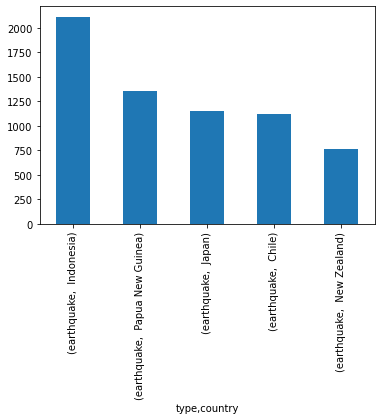

In [125]:
#simple visualization using barchart

top_affected.plot(kind='bar');

In [102]:
#fileterd: quake_ge4, unfilterd: earthquaabs

quake_ge4.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
10,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,usc000mqlp,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
14,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,usc000mqln,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand


In [103]:
earthquakes.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada


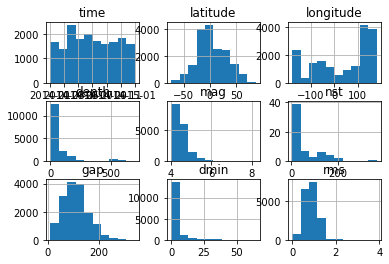

In [117]:
quake_ge4.hist();

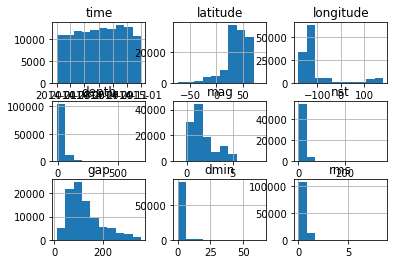

In [123]:
earthquakes.hist();

In [124]:
earthquakes.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,country
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,ml,4.0,171.43,0.342,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
2,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska


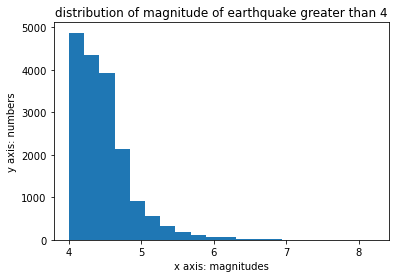

In [120]:
plt.hist(quake_ge4.mag, bins=20)
plt.title('distribution of magnitude of earthquake greater than 4')
plt.xlabel('x axis: magnitudes')
plt.ylabel('y axis: numbers');

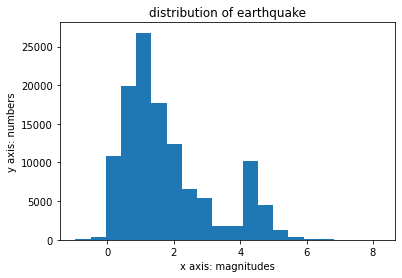

In [118]:
plt.hist(earthquakes.mag, bins=20)
plt.title('distribution of earthquake')
plt.xlabel('x axis: magnitudes')
plt.ylabel('y axis: numbers');

In [24]:
places.head()

0    26km S of Redoubt Volcano, Alaska
1              32km S of Alamo, Nevada
2     12km NNW of North Nenana, Alaska
3           22km S of Cantwell, Alaska
4         10km WNW of Progreso, Mexico
Name: place, dtype: object

In [ ]:
pla